<a href="https://colab.research.google.com/github/ActiveStacks/AI_with_PyTorch/blob/main/MiniThesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# CLASSIFIERS
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# path = ('.\LVDAndro_APKs_Combined_Processed')
# df = pd.read_csv(path)
# df=pd.read_excel(r'TT.xlsx',skiprows=1)
# path = ('.\LVDAndro_All_MobSF_Processed.csv')

path = ('/content/drive/MyDrive/LVDAndro_SourceFiles_Qark_Processed.csv')
# path = ('/content/drive/MyDrive/XSS_dataset.csv')
df_raw = pd.read_csv(path)

In [ ]:
df = df_raw.sample(n=13686, random_state=42)

In [ ]:
df

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
104902,104902,NaN,NaN,NaN,public static boolean isAppEnabled(final Conte...,NaN,NaN,0,public static boolean isAppEnabled(final Conte...
1472,1472,NaN,NaN,NaN,"finalJSON.put(TABLE_NAME, resultSet);",NaN,NaN,0,"finalJSON.put(TABLE_NAME, resultSet);"
243271,243271,NaN,NaN,NaN,if(getSupportActionBar() != null) {,NaN,NaN,0,if(getSupportActionBar() != null) {
236205,236205,NaN,NaN,NaN,if (!Utils.isNullOrEmpty(text)) {,NaN,NaN,0,if (!Utils.isNullOrEmpty(text)) {
410942,421388,NaN,NaN,NaN,View v = getChildTabViewAt(i);,NaN,NaN,0,View v = getChildTabViewAt(i);
...,...,...,...,...,...,...,...,...,...
426563,438140,NaN,NaN,NaN,"if (TextUtils.equals(packageName, app.packageN...",NaN,NaN,0,"if (TextUtils.equals(packageName, app.packageN..."
83288,83288,NaN,NaN,NaN,"{3, 2, 1, 1}, // 0",NaN,NaN,0,"{3, 2, 1, 1}, //user_comment"
43517,43517,NaN,NaN,NaN,final boolean screenOrientation = (point.x / p...,NaN,NaN,0,final boolean screenOrientation = (point.x / p...
358663,364478,NaN,NaN,NaN,in.readStringList(cat);,NaN,NaN,0,in.readStringList(cat);


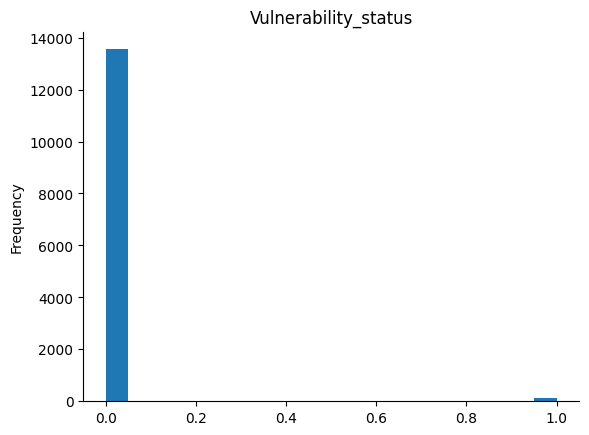

In [ ]:
from matplotlib import pyplot as plt
df['Vulnerability_status'].plot(kind='hist', bins=20, title='Vulnerability_status')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_safe = df[df['Vulnerability_status'] == 0]

In [ ]:
df_safe.describe()

,index,Vulnerability_status
count,13551.000000,13551.0
mean,303127.473692,0.0
std,178522.543542,0.0
min,102.000000,0.0
25%,151192.000000,0.0
50%,296130.000000,0.0
75%,459522.500000,0.0
max,618280.000000,0.0


In [ ]:
df_unsafe = df[df['Vulnerability_status'] == 1]

In [ ]:
df_unsafe.describe()

,index,Vulnerability_status
count,135.000000,135.0
mean,339454.325926,1.0
std,197571.883543,0.0
min,1983.000000,1.0
25%,164772.000000,1.0
50%,339826.000000,1.0
75%,537780.500000,1.0
max,618123.000000,1.0


from matplotlib import pyplot as plt
_df_5['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Vulnerability_status'].plot(kind='hist', bins=20, title='Vulnerability_status')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='index', y='Vulnerability_status', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Vulnerability_status'].plot(kind='line', figsize=(8, 4), title='Vulnerability_status')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
X = df['processed_code']
y = df['Vulnerability_status']

In [ ]:
vectorsTf = TfidfVectorizer()


In [ ]:
X_vect = vectorsTf.fit_transform((X).values.astype('U'))

In [ ]:

from sklearn.model_selection import train_test_split




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size = 0.2, random_state = 1)

In [ ]:
classifier_tree = DecisionTreeClassifier(random_state=42)

In [ ]:
model_CART = classifier_tree.fit(X_train, y_train)

In [ ]:
y_predict = model_CART.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(f"Accuracy of Decision on test set : {accuracy_score(y_test, y_predict)}")
print(f"Precion of Decision Tree on test set : {precision_score(y_test, y_predict)}")
print(f"Recall of Decision Tree on test set : {recall_score(y_test, y_predict)}")

Accuracy of Decision on test set : 0.987582176771366
Precion of Decision Tree on test set : 0.46153846153846156
Recall of Decision Tree on test set : 0.375


In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2706
           1       0.46      0.38      0.41        32

    accuracy                           0.99      2738
   macro avg       0.73      0.68      0.70      2738
weighted avg       0.99      0.99      0.99      2738



..........RESULTS GENERATED................
Predicted sentiments of the News:  [0 0 0 ... 0 0 0]
          
..........CLASSIFICATION REPORT................
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2706
           1       0.46      0.38      0.41        32

    accuracy                           0.99      2738
   macro avg       0.73      0.68      0.70      2738
weighted avg       0.99      0.99      0.99      2738

          
..........CLASSIFICATION SCORE................
Classification score: 0.987582176771366
          
..........CONFUSION MATRIX................
Confusuion Matrix of the predicitons: 
[[2692   14]
 [  20   12]]
          


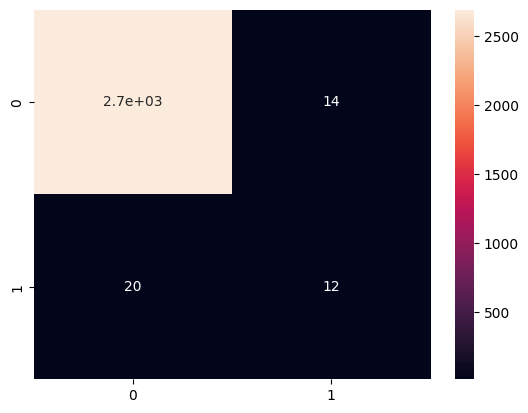

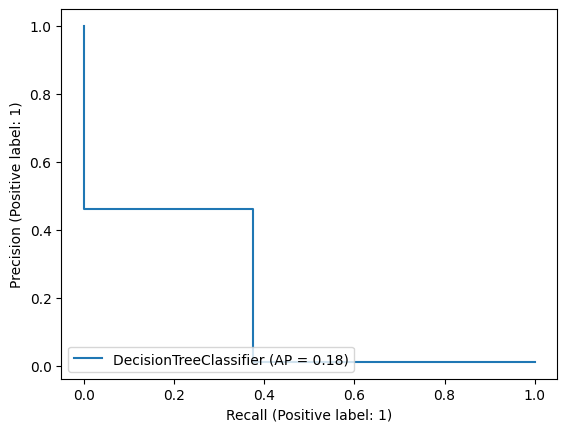

..........PRECISION RECALL CURVE................
Precison and Recall Curve of the predicitons: 


In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import classification_report


print("..........RESULTS GENERATED................")
print("Predicted sentiments of the News: ", y_predict)


# target_names = ['REAL', 'FAKE']

print("          ")
print("..........CLASSIFICATION REPORT................")
print(classification_report(y_test, y_predict))

print("          ")
print("..........CLASSIFICATION SCORE................")
scores = model_CART.score(X_test, y_test)
print("Classification score:", scores)


import matplotlib.pyplot as plt
import seaborn as sns
matrx = confusion_matrix(y_test, y_predict)
sns.heatmap(matrx, annot=True)
print("          ")
print("..........CONFUSION MATRIX................")
print("Confusuion Matrix of the predicitons: ")
print(matrx)
print("          ")



PrecisionRecallDisplay.from_estimator(model_CART, X_test, y_test)
plt.show()

print("..........PRECISION RECALL CURVE................")
print("Precison and Recall Curve of the predicitons: ")